In [ ]:
#mounting google drive in google colab
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
cd drive/'My Drive'/  

/content/drive/My Drive


In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [ ]:
!pip install --upgrade --ignore-installed kaggle

     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 153kB 10.8MB/s 
     |████████████████████████████████| 235kB 25.3MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 71kB 10.6MB/s 
     |████████████████████████████████| 143kB 48.3MB/s 
     |████████████████████████████████| 184kB 53.3MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=b5c7716654c341f37bec9bf2c1aaa019994bc49fddc28065dd04c532f9d39091
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6769 sha256=38d0d8d5733d23e9cd3034047dea72b1e5952d6614bf1311dedf4231802ac8c4
  Stored in directory: /root/.cache/pip/wheels/67/b8/ba/041548f30a6fc058c9b3

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sadafiftikharmsds1","key":"54116edd9e66393de2a1e53f7b903561"}'}

In [ ]:
!mkdir ~/.kaggle #created at root folder in colab

In [ ]:
#copy
!cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
utkarshxy/who-worldhealth-statistics-2020-complete             World Health 2020 🌏 | For Geospatial Analysis         1MB  2021-01-06 16:22:50            823        124  1.0              
gpreda/pfizer-vaccine-tweets                                   Pfizer Vaccine Tweets                               403KB  2021-01-06 15:11:07            580         68  1.0              
google/android-smartphones-high-accuracy-datasets              Android smartphones high accuracy GNSS datasets       1GB  2020-12-23 01:51:11            126         29  0.875            
ashkhagan/women-representation-in-city-property-sanfrancisco   Wo

In [ ]:
# this will download the dataset and unzip to colab
!kaggle datasets download -d puneet6060/intel-image-classification 

100% 346M/346M [00:03<00:00, 158MB/s]
100% 346M/346M [00:03<00:00, 103MB/s]


In [ ]:
# !cp -r "/content/drive/MyDrive/intel-image-classification.zip" "/content/"

cp: '/content/intel-image-classification.zip' and '/content/intel-image-classification.zip' are the same file


In [ ]:
!unzip -q intel-image-classification.zip

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import keras

In [ ]:
training_path = 'seg_train/seg_train'
validation_path = 'seg_test/seg_test'

In [ ]:
image_size = 150
IMG_SHAPE = (image_size, image_size, 3)

base_model = keras.applications.VGG19(input_shape=IMG_SHAPE,include_top=False, weights='imagenet')
#Create the base model from the pre-trained model MobileNet V2
# base_model = keras.applications.ResNet50(input_shape=IMG_SHAPE,include_top=False, weights='imagenet')
# base_model = keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE,include_top=False, weights='imagenet')
                                          
base_model.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# useful for getting number of classes
folders = glob('seg_train/seg_train/*')
print(folders)

['seg_train/seg_train/buildings', 'seg_train/seg_train/glacier', 'seg_train/seg_train/mountain', 'seg_train/seg_train/sea', 'seg_train/seg_train/forest', 'seg_train/seg_train/street']


In [ ]:
# our layers - you can add more if you want
modelx = Flatten()(base_model.output)
modelx = Dense(1024, activation='relu')(modelx)
modelx = Dense(256, activation='relu')(modelx)
# modelx = Dense(256, activation='relu')(modelx)
model = Dense(len(folders), activation='softmax')(modelx)

# create a model object
model = Model(inputs=base_model.input, outputs=model)


model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:

opt = keras.optimizers.RMSprop(learning_rate=0.001)
#compiling model             
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Set Data Generator for training, testing and validataion.
from keras.preprocessing.image import ImageDataGenerator
# Note for testing, set shuffle = false (For proper Confusion matrix)

img_rows = 150
img_cols = 150
batch_size = 80

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(training_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)


valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_generator = valid_datagen.flow_from_directory(validation_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)


test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory('drive/MyDrive/seg_pred/seg_pred',
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 6 classes.


In [ ]:
# fit the model
history = model.fit_generator(
  training_set,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_generator)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
176/176 [==============================] - 119s 625ms/step - loss: 2.3733 - accuracy: 0.5913 - val_loss: 0.4921 - val_accuracy: 0.8117
Epoch 2/10
176/176 [==============================] - 106s 600ms/step - loss: 0.5005 - accuracy: 0.8124 - val_loss: 0.5507 - val_accuracy: 0.7837
Epoch 3/10
176/176 [==============================] - 102s 581ms/step - loss: 0.4209 - accuracy: 0.8405 - val_loss: 0.4370 - val_accuracy: 0.8363
Epoch 4/10
176/176 [==============================] - 101s 575ms/step - loss: 0.3973 - accuracy: 0.8475 - val_loss: 0.4185 - val_accuracy: 0.8350
Epoch 5/10
176/176 [==============================] - 103s 584ms/step - loss: 0.3684 - accuracy: 0.8647 - val_loss: 0.3824 - val_accuracy: 0.8567
Epoch 6/10
176/176 [==============================] - 102s 579ms/step - loss: 0.3552 - accuracy: 0.8720 - val_loss: 0.3958 - val_accuracy: 0.8427
Epoch 7/10
176/176 [==============================] - 102s 579ms/step - loss: 0.3362 - accuracy: 0.8759 - val_loss: 0.3791 -

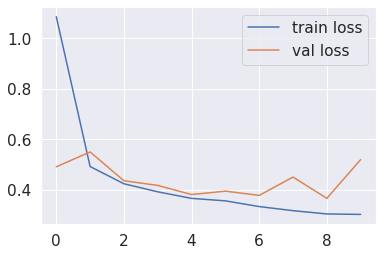

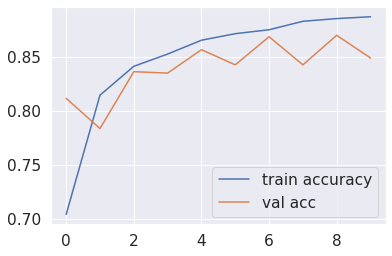

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# accuracies
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [ ]:
# save model and architecture to single file
model.save('vgg-19-weights.h5')


In [ ]:
# import the necessary packages
import argparse
import pickle
import cv2
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import logging, os
import sys 
from keras.preprocessing import image
import math
import operator
from pathlib import Path

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')



In [ ]:
#Print the Target names



target_names = []

for key in training_set.class_indices:

    target_names.append(key)



print(target_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


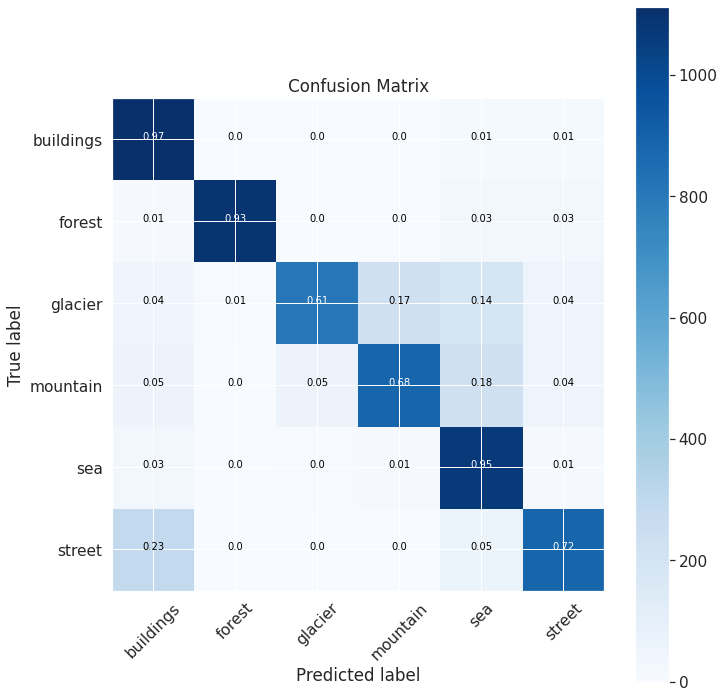

In [ ]:
# from keras.models import load_model
# # load model
# model = load_model('vgg-check.h5')
import numpy as np

#Confution Matrix 
from sklearn.metrics import confusion_matrix
import itertools 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix') 

In [1]:
from keras.models import load_model
# Loading the mode
model = load_model('vgg-19-weights.h5')
print('model loaded!')

model loaded!


In [29]:
import numpy as np
from PIL import Image
from keras.preprocessing import image
img = image.load_img('88.jpg')# , target_size=(32,32))
img  = image.img_to_array(img)
img  = img.reshape((1,) + img.shape)
# img  = img/255
# img = img.reshape(-1,784)
img_class=model.predict(img) 
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  [0. 1. 0. 0. 0. 0.]


In [30]:
myClasses = ['building','forest', 'glacier', 'mountain', 'sea', 'street']

import operator
index, value = max(enumerate(classname), key=operator.itemgetter(1))
cls = myClasses[index]
print(cls)

forest


In [35]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open('88.jpg')
width, height = image.size 

draw = ImageDraw.Draw(image)

text = cls
textwidth, textheight = draw.textsize(text)

margin = 10
x = width - textwidth - margin
y = height - textheight - margin

draw.text((x, y), text)

image.save('mpred2.jpg')